# LOGISTIC REGRESSION

###### 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
###### 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).

b. Encode categorical variables.
###### 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.
###### 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

b.Visualize the ROC curve.
###### 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).
###### 6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

### Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [3]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(train_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


b. Examine the features, their types, and summary statistics.

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.shape

(418, 11)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


In [13]:
#summary statistics
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  


In [14]:
print(test_df.describe())

       PassengerId     Pclass        Age      SibSp      Parch        Fare
count    87.000000  87.000000  87.000000  87.000000  87.000000   87.000000
mean   1102.712644   1.137931  39.247126   0.597701   0.482759   98.109198
std     126.751901   0.435954  15.218730   0.637214   0.860801   88.177319
min     904.000000   1.000000   1.000000   0.000000   0.000000    0.000000
25%     986.000000   1.000000  27.000000   0.000000   0.000000   35.339600
50%    1094.000000   1.000000  39.000000   1.000000   0.000000   71.283300
75%    1216.000000   1.000000  50.000000   1.000000   1.000000  135.066650
max    1306.000000   3.000000  76.000000   3.000000   4.000000  512.329200


c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

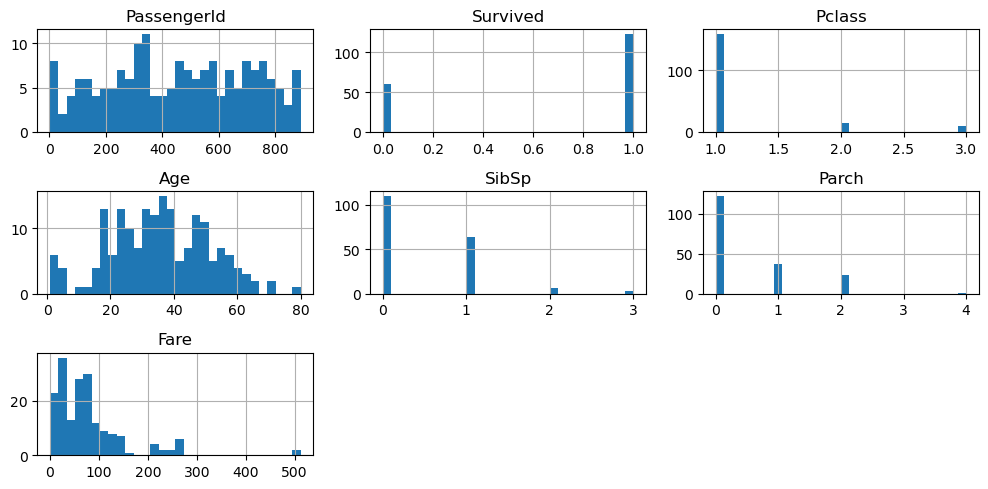

In [15]:
# Histograms
train_df.hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()

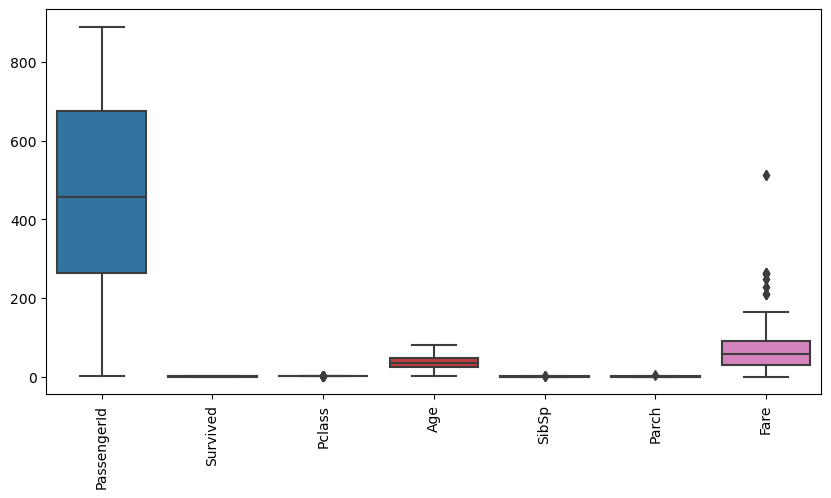

In [16]:
# Box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df)
plt.xticks(rotation=90)
plt.show()

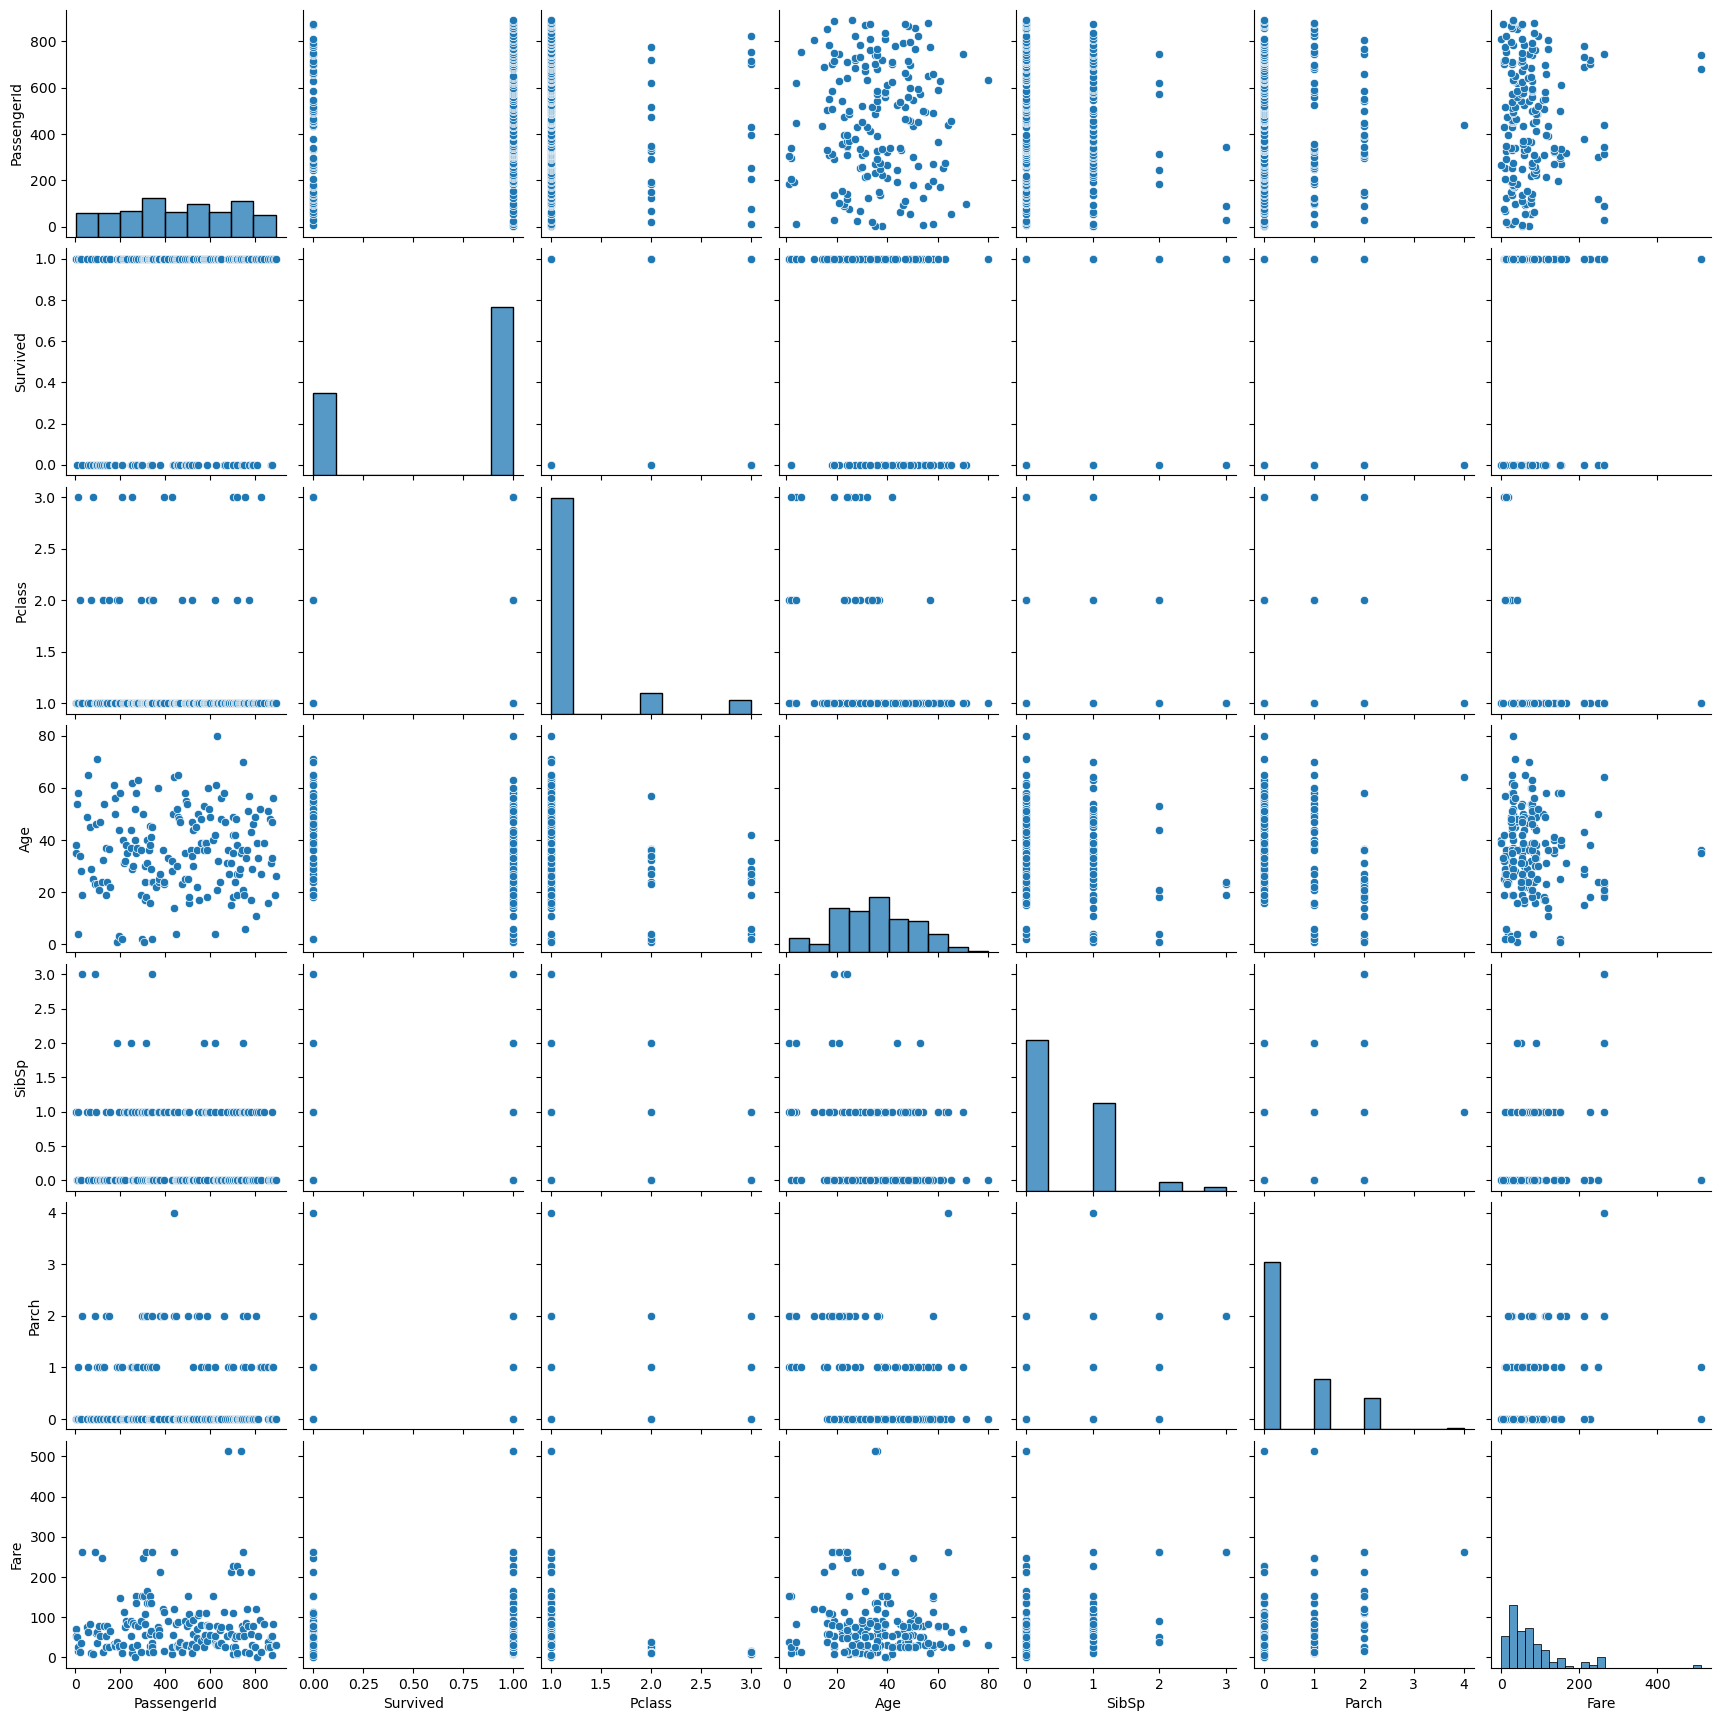

In [17]:
# pair plot
sns.pairplot(train_df)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10764\1575161386.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


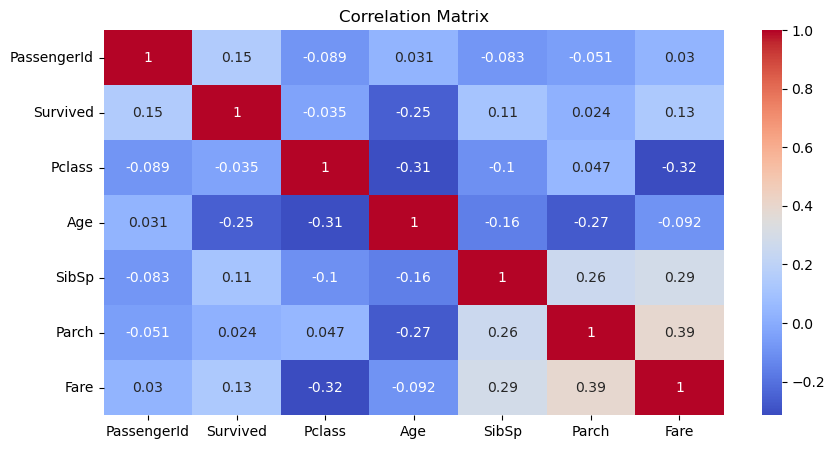

In [18]:
# correlation matrix
plt.figure(figsize=(10,5))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


###### Analyzing Patterns and Correlations
All three models show the same performance metrics, with an accuracy of **78.76%** and an F1-score of **77.72%**. This consistency could be due to using the same data split for training and testing, leading to similar outcomes regardless of the model type. It might also indicate potential data imbalance, where accuracy alone doesn’t fully capture the model's performance. Additionally, the lack of variation could be a result of not applying hyperparameter tuning, which can significantly impact model effectiveness. Exploring techniques like cross-validation, feature engineering, or optimizing model parameters could help improve these results.

### 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

In [19]:
#Missing value
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [20]:
print(test_df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


###### No missing values

b. Encode categorical variables.

In [21]:
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [23]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,26,26.5500,43,2


### 3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [26]:
X = train_df.drop('Survived', axis=1)  
y = train_df['Survived']

In [27]:
X.shape

(183, 11)

In [28]:
y.shape

(183,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((146, 11), (37, 11), (146,), (37,))

b. Train the model using the training data.

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model_log = clf.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
train_predicted = clf.predict(X_train)
train_predicted

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

### 4. Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [34]:
cm = confusion_matrix(y_train, train_predicted)
cm

array([[26, 20],
       [13, 87]], dtype=int64)

In [35]:
print(classification_report(y_train, train_predicted))

              precision    recall  f1-score   support

           0       0.67      0.57      0.61        46
           1       0.81      0.87      0.84       100

    accuracy                           0.77       146
   macro avg       0.74      0.72      0.73       146
weighted avg       0.77      0.77      0.77       146



b.Visualize the ROC curve.

Text(0, 0.5, 'True Positive Rate')

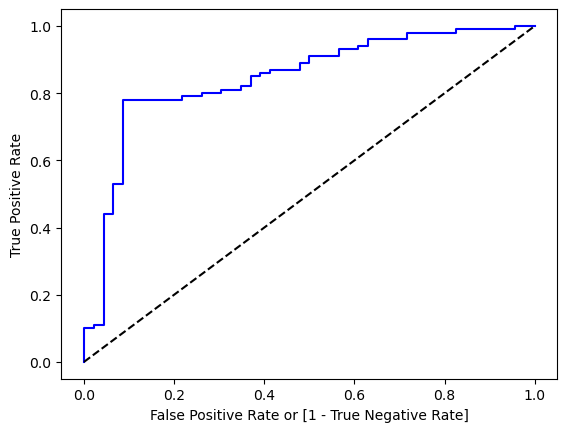

In [36]:
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train, train_predicted)

import matplotlib.pyplot as plt
x= 10
plt.plot(fpr, tpr, 
         color='blue'
        )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 5. Interpretation:

a. Interpret the coefficients of the logistic regression model.

In [37]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18,0,47.0,1,1,33,52.5542,91,2
872,873,0,1,35,1,33.0,0,0,89,5.0000,29,2
879,880,1,1,140,0,56.0,0,1,38,83.1583,61,0
887,888,1,1,75,0,19.0,0,0,10,30.0000,25,2


In [39]:
features = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model_log.coef_[0]})
print(coefficients)

        Feature  Coefficient
0   PassengerId     0.001456
1        Pclass     0.360816
2          Name    -0.006127
3           Sex    -2.262709
4           Age    -0.008028
5         SibSp     0.459864
6         Parch    -0.030430
7        Ticket    -0.003407
8          Fare     0.001739
9         Cabin     0.002018
10     Embarked    -0.469200


b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [40]:
important_features = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nImportant features in predicting survival:")
print(important_features)


Important features in predicting survival:
        Feature  Coefficient
3           Sex    -2.262709
10     Embarked    -0.469200
5         SibSp     0.459864
1        Pclass     0.360816
6         Parch    -0.030430
4           Age    -0.008028
2          Name    -0.006127
7        Ticket    -0.003407
9         Cabin     0.002018
8          Fare     0.001739
0   PassengerId     0.001456


### 6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

In [41]:
from pickle import dump
dump(model_log, open('at.pkl1','wb'))

## Interview Questions:

#### 1. What is the difference between precision and recall?
Precision measures how many of the predicted positive results are actually correct, while recall measures how many of the actual positive cases were correctly identified. Precision focuses on the quality of positive predictions, and recall focuses on capturing all relevant positives.

#### 2.What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique where the dataset is split into multiple subsets (folds), and the model is trained and tested on different combinations of these folds to ensure it performs well on unseen data. It’s important in binary classification as it helps prevent overfitting, providing a more reliable estimate of the model’s performance across different data samples.